# CSV to `GeoDataFrame`

Let's start importing packages and updating viewing options:

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt


# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

In [4]:
power_plants.head(3)

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [5]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [6]:
# Explore CRS
print('CRS: ', power_plants.crs)
print('ellipsoid: ', power_plants.crs.ellipsoid)
print('datum: ', power_plants.crs.datum)
print('is the CRS geographic?: ', power_plants.crs.is_geographic)
print('is the CRS projected?: ', power_plants.crs.is_projected)

CRS:  EPSG:4269
ellipsoid:  GRS 1980
datum:  North American Datum 1983
is the CRS geographic?:  True
is the CRS projected?:  False


<Axes: >

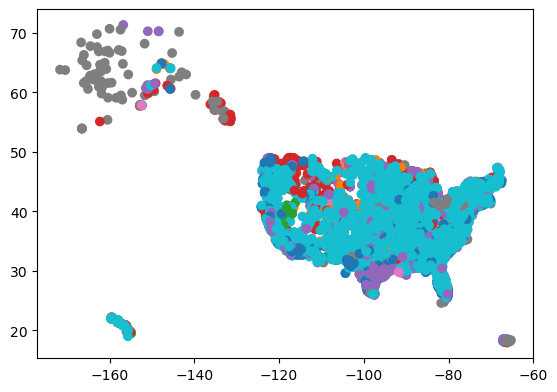

In [7]:
# Plot points and color them according to values in primsource column
power_plants.plot(column='primsource')  

## f-strings

So far, we have printed variables using string concatenation inside the `print()` function. We use commas to separate every variable and string that we want to print:

In [8]:
print('CRS', power_plants.crs)

CRS EPSG:4269


Another populat way to mix variables and strings in a print statement is an **f-string**, stands for formatted string. 

The simplest syntax:
```python
f"some text {replace}"
```

Where `replace` can be a variable, expression, function, or method call.

Example:

In [9]:
# Check the ellipsoid
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [10]:
# Use f-strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


f-string can live on it's own or inside the print statement

Advantages: Lots of customization for formatting output

In [11]:
# Set label width to 25 characters to align the answers
print(f"{'Is the CRS geographic?:':<25}{power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25}{power_plants.crs.is_projected}")

Is the CRS geographic?:  True
Is the CRS projected?:   False


`<25` aligns the output of the variables so it looks nice. 

## Import shape file

In [12]:
# Check current working directory
os.getcwd()

'/Users/hoyler/MEDS/EDS-220/eds220-2024-in-class'

In [13]:
# Create absolute filepath to data
fp = os.path.join('/', 'courses', 'EDS220', 'data', 'tl_2022_us_state', 'tl_2022_us_state.shp')
# fp = os.path.join('data', 'tl_2022_us_state', 'tl_2022_us_state.shp')

# Import states data
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)


ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

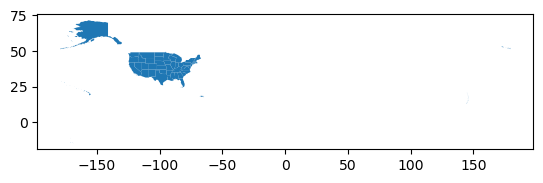

In [14]:
print(states.crs)
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings. Let's update the corresponding columns in the geo-dataframe: `region`, `division`, `statefp`

First thing, check the data type. Are there columns with strings?

In [15]:
print(f"region is string dtype {is_string_dtype(states['region'])}")

region is string dtype True


This is inconvenient to do many times, so we can use a for loop to succinctly print the same info

In [16]:
code_cols = ['region','division', 'statefp']

# Check whether code columns are strings
for column in code_cols:
    print(f"{column} is string dtype {is_string_dtype(states[column])}")

region is string dtype True
division is string dtype True
statefp is string dtype True


`for` loops execute a block og code a fixed number of times, iterating over a set of objects. 

**DRY code**

DRY = Don't Repeat Yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic. 

Next, update the data type of the code column to be integers.
This time, we verify the data type of the column using `is_numeric_dtype` and `assert` statement

In [17]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int') # here you use brackets cuz it's in for loop, not a method
    assert is_numeric_dtype(states[column]) # Check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`

If the expression is `False`, then `Assert` raises an `AssertionError` and stops your code from running.
Example:

In [18]:
# Does nothing if statement is True
assert 2 + 2 == 4

# Raises an error if False
# assert 2 + 3 == 4

## Data Selection

For this lession, we want to use only contiguous states. The `states` geo-dataframe covers a bigger extension

## Check-in

- What are the unique values for region, division, or state codes in the data?
- Which codes should we select to keep only states in the contiguous US?

In [19]:
# Check unique values in desired column
for column in code_cols:
    print(f"Unique values in {column} are {states[column].unique()}")

Unique values in region are [3 2 1 4 9]
Unique values in division are [5 3 4 1 8 9 2 7 6 0]
Unique values in statefp are [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Don't want 9 from region

Don't want 0 from division

Don't want 2 and 15 from statefp

In [20]:
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]

<Axes: >

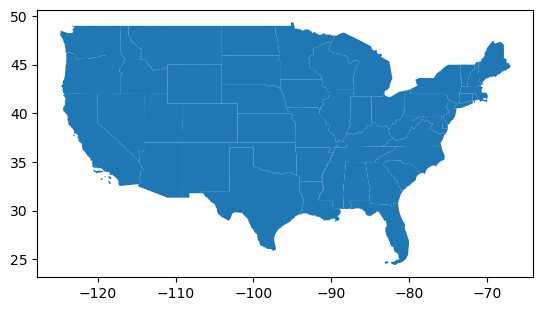

In [21]:
contiguous.plot()

The `~` tilde symbol is used in python to negate a statement.

## Check-in

Select the data in the `power_plants` dataframe for the contiguous US states. 

In [22]:
# Everything except puerto rico, hawaii, and alaska
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

## Plotting

Before we plot, check CRS

In [23]:
contiguous.crs == power_plants.crs

True

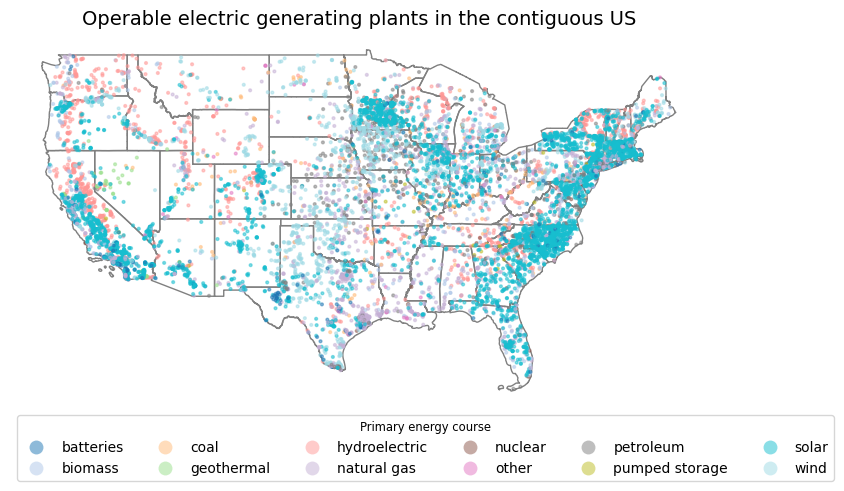

In [24]:
fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Operable electric generating plants in the contiguous US', fontsize=14)

contiguous.plot(ax=ax,
                color='none',
                edgecolor='gray')

# Add electric power plants colored by energy course
power_plants.plot(ax=ax, 
                  column='primsource', # color by values in this column
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title':'Primary energy course',
                      'title_fontsize':'small',
                      'ncol':6, # sets number of columns, makes it horizontal
                      'loc':'upper left',
                      'bbox_to_anchor':(0,0)
                      }
                      )


plt.show()

`kwds` expects a dictionary, stands for keywords

We controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`:

- `loc` indicates **the corner of the legend that we want to use for placement** Where you are grabbing your legend and moving it around from
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axis. Values between 0-1 are inside the axis. 

## `for` with `zip`

Often, we need to iterate simultaneously over two lists (or iterables), 

`zip()` is a python function that allows you to combine two lists so that you can iterate over their elements in pairs. 

When used in a `for` loop, it allows you to process elements of each list together

Example:

In [25]:
# Iterate over a single list
numbers = [1,2,3]
for num in numbers:
    print(num)

1
2
3


In [27]:
# Iterate over two lists in pairs using zip
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example: with `matplotlib`
A common situation when code gets repeated is when creating subplot. 

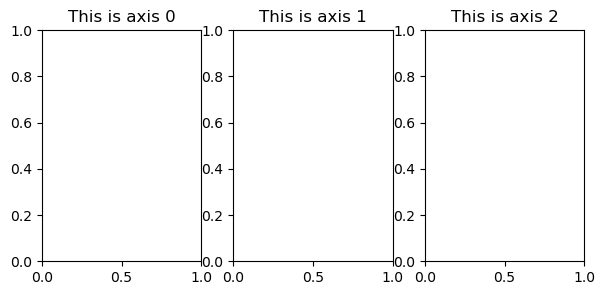

In [29]:
# Figure will have 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

In [30]:
axes

array([<Axes: title={'center': 'This is axis 0'}>,
       <Axes: title={'center': 'This is axis 1'}>,
       <Axes: title={'center': 'This is axis 2'}>], dtype=object)

## Check-in

Use `for` and `zip` to create the same subplots and avoid redundancy

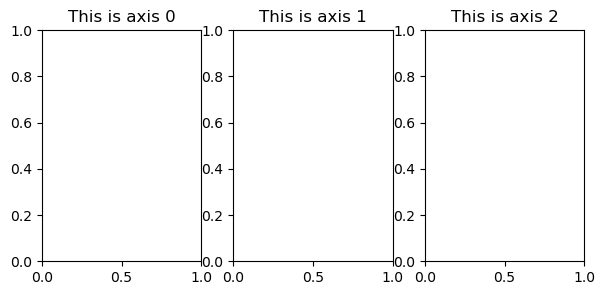

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))


for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis {i}")

plt.show()

# More elegant solution
# for i in [0,1,2]:
#     axes[1].set_title(f"This is axis {1}")

## Exercise 

1. Select the power plants in CA in a variable named `ca_power_plants`
2. Create a _list_ named `top_sources` with CA top 3 electric primary sources

In [48]:
power_plants.head()

,unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
5,5.0,11575,10,Greene County,195,Alabama Power Co,Electric Utility,Highway 43,Demopolis,Greene,Alabama,36732.0,natural gas,Natural Gas = 1256.1 MW,Natural Gas Fired Combustion Turbine; Natural ...,1288.4,1256.1,NaN,NaN,NaN,NaN,NaN,NaN,1256.1,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.781100,32.601700,POINT (-87.78110 32.60170)


In [56]:
ca_power_plants = power_plants[power_plants['state']== 'California']

In [66]:
top_sources = ca_power_plants.primsource.value_counts().head(3).keys().to_list()

In [84]:
# Carmen's way of doing this step
top_sources = ca_power_plants.primsource.value_counts().index[:3].tolist()

In [71]:
ca_boundary = contiguous[contiguous['name'] == 'California']

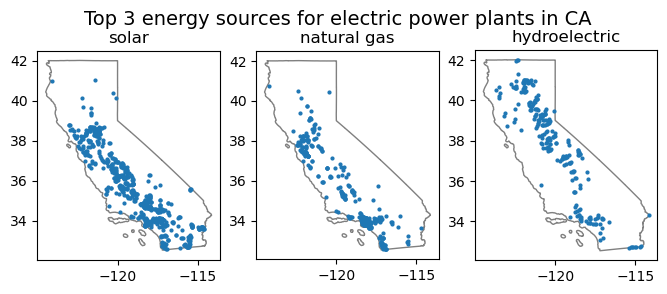

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,3))

# Remove axis for a cleaner map
ax.axis('off')

                     
for ax, i in zip(axes, top_sources):
    ax.set_title(i)
    ca_boundary.plot(ax=ax,
                color='none',
                edgecolor='gray')
    # Select points for the sources --> Carmen's way
    # subset = ca_power_plants[ca_power_plants.primsource==i]
    # subset.plot(ax=ax, markersize=0.5)
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax=ax,
                                                             markersize = 4)
    
fig.suptitle('Top 3 energy sources for electric power plants in CA', fontsize=14)
plt.show()                     


## Functions

**functions** in python are blocks of reusable code desigend to perform specific tasks and make your code more modular and organized.

The general syntax:
Docstring is acomment that explains what a function does

```python
def function_name(pararmeter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value # Depends on the function
```

examples:
A simple function with a one line docstring and no return values

In [98]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome to the class!')

In [99]:
greet()

Hello, welcome to the class!


Example 2:
A function with a more detailed docstring and a return value

In [103]:
def circle_area(radius):
    """
    Calculate the area of a circle given its radius
    
    Args: 
        radius (float): The radius of the circle
    Returns:
        float: The area of the circle, calculated as pi * radius^2
    """
    area = 3.14159 * radius ** 2
    return area

In [102]:
circle_area(1)

3.14159

## Example

Going to power plants df, create a function that will give us the top 3 primsources for a given state

In [107]:
# Make sure the code works for a single state, then make it more general
def top3_sources(state):
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = state_power_plants.primsource.value_counts().index[:3].tolist()
    return top_sources

In [108]:
top3_sources('New York')

['solar', 'hydroelectric', 'natural gas']